In [1]:
import math
import sympy
from sympy import symbols
import numpy as np
import csv
import random
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import plot
import plotly.graph_objs as go
import plotly as py
from matplotlib.collections import LineCollection
from matplotlib.patches import PathPatch
from matplotlib.path import Path
import tensorflow as tf
from tensorflow import keras
import statistics
import pylab
np.set_printoptions(precision=4)

In [3]:
df = pd.read_csv('/content/RF-Spectrum Measurment.csv')
arr1=np.array(df)

In [4]:
r , c = np.shape(arr1)

In [14]:
print(c)

377


In [5]:
arr2 =  np.zeros([r * (c - 1),2])

In [6]:
T = np.linspace(0,100 * (c - 1),r * (c - 1))

In [7]:
arr2[:,0] = T

In [8]:
for i in range(0,c - 1):
  arr2[i * r:i * r + r,1] = arr1[:,i + 1]

In [19]:
df = pd.DataFrame(arr2[:,1],columns=['SignalSt'])

In [20]:
train_size= int(len(df) * 0.8)
test_size= len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train),len(test))

120620 30156


In [21]:
def create_dataset(X,y,time_steps=1):
    Xs, ys= [],[]
    for i in range(len(X)-time_steps):
        v= X.iloc[i:(i+time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)
time_steps = 1

In [22]:
X_train, y_train = create_dataset(train, train.SignalSt, time_steps)

In [23]:
X_test, y_test = create_dataset(test, test.SignalSt, time_steps)
print(X_train.shape, y_train.shape)

(120619, 1, 1) (120619,)


In [ ]:
model=keras.Sequential( )
model.add(keras.layers.LSTM(128,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adam(0.0005))
history= model.fit(X_train, y_train, epochs=250, batch_size = 16,
                  validation_split = 0.2 , verbose = 0, shuffle = False)
plt.figure(2)
plt.plot(history.history['loss'], label= 'train')
plt.plot(history.history['val_loss'], label= 'test')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(3)

y_pred=model.predict(X_test)

plt.plot(np.arange(0,len(y_train)), y_train, 'g',label="history")
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_test, marker='.',label="true")
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_pred,  'r', label="prediction")
plt.ylabel('Signal Strength')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [ ]:
av_row = np.zeros(r)
for i in range(0,r):
  av_row[i] = np.mean(arr1[i,1:])

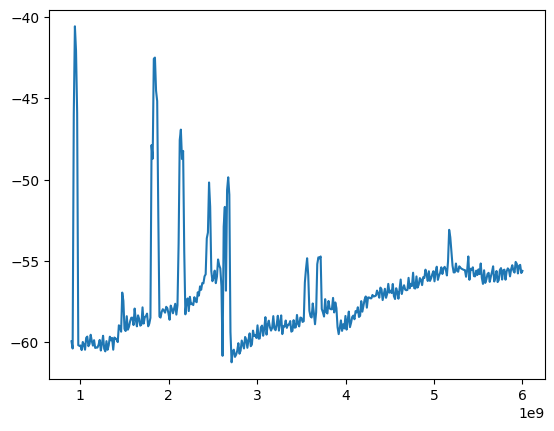

In [ ]:
plt.plot(arr1[:,0],av_row)

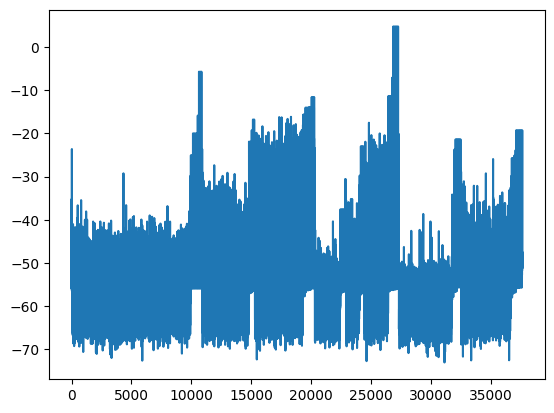

In [10]:
plt.plot(arr2[:,0],arr2[:,1])

In [ ]:
df = pd.DataFrame(arr2,columns=['T','Signal Strength'])
fig = px.line(df, x='T', y='Signal Strength')
plot(fig)

'temp-plot.html'